In [2]:
from pathlib import Path
import json
import torch
import matplotlib.pyplot as plt

from board_recognition.eval import evaluate_trained_model
from board_recognition_run.pipeline import PROJECT_ROOT

In [3]:

PROJECT_ROOT = Path.cwd().parent.resolve()

CKPT_PATH   = PROJECT_ROOT / "runs" / "board_recognition" / "20250907_231248" / "model.pth"
TEST_IMAGES = PROJECT_ROOT / "datasets" / "synthetic_dataset_3_high"  / "test" / "images"
TEST_CSV    = PROJECT_ROOT / "datasets" / "synthetic_dataset_3_high"  / "test" / "corners.csv"

print(CKPT_PATH)
print(TEST_IMAGES)
print(TEST_CSV)

NUM_KEYPOINTS = 4      # TL, TR, BL, BR
DEVICE = "cuda"

C:\Users\mauri\PycharmProjects\ChessVision\runs\board_recognition\20250907_231248\model.pth
C:\Users\mauri\PycharmProjects\ChessVision\datasets\synthetic_dataset_3_high\test\images
C:\Users\mauri\PycharmProjects\ChessVision\datasets\synthetic_dataset_3_high\test\corners.csv


In [4]:
evaluate_trained_model(
    model_path=CKPT_PATH,
    dataset_root=TEST_IMAGES,
    csv_path=TEST_CSV,
    num_keypoints=NUM_KEYPOINTS,
    output_dir=  PROJECT_ROOT / "runs" / "board_recognition" / "20250907_231248" / "chessred2k_real_eval",
    device=DEVICE
)

Evaluating: 100%|██████████| 250/250 [02:26<00:00,  1.70batch/s]


[Eval-Save] Metrics written to C:\Users\mauri\PycharmProjects\ChessVision\runs\board_recognition\20250907_231248\chessred2k_real_eval\metrics.json


{'mean_l2_px': 7.138398764967919,
 'mean_pck_3px': 0.4087500025331974,
 'mean_pck_5px': 0.7164166687726975,
 'mean_pck_norm_005': 0.9917500000596047,
 'mean_pck_norm_010': 0.9922500000596046,
 'bbox_map': 0.9600974321365356,
 'bbox_map_50': 1.0}

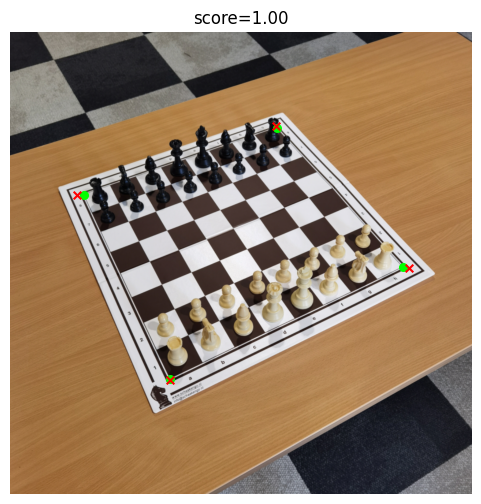

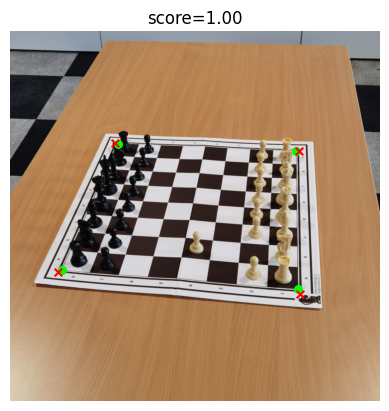

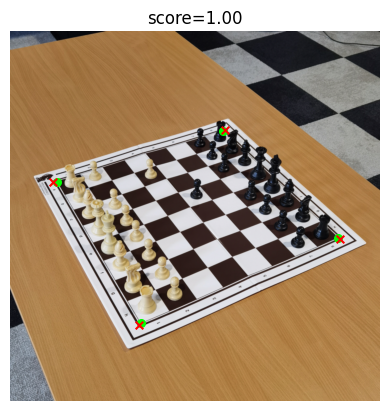

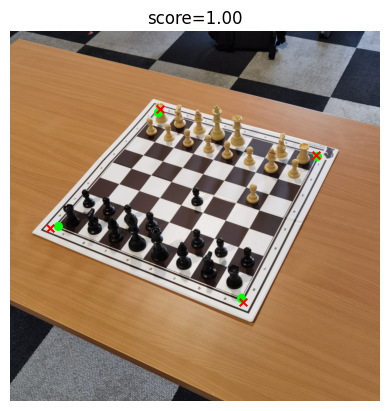

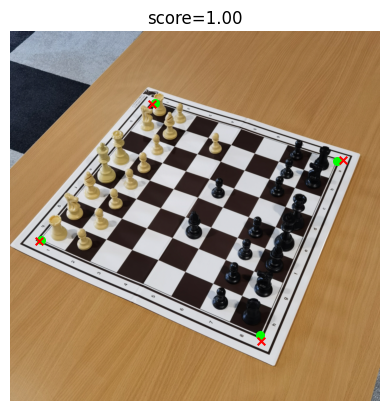

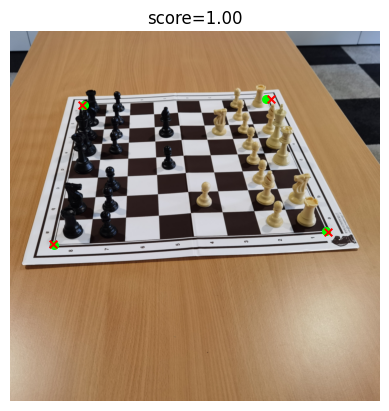

In [4]:
from board_recognition.eval import preview_predictions
from board_recognition import load_model

model = load_model(CKPT_PATH)

preview_predictions(
    model=model,
    dataset_root=TEST_IMAGES,
    csv_path=TEST_CSV,
    device="cuda",
    batch_size=4,
    max_examples=6,   # show 6 images, early-exit afterwards
)